In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

ModuleNotFoundError: No module named 'save_file'

In [2]:
ski_data= pd.read_csv('/Users/josephlim/PycharmProjects/ski_resort_data.csv')

In [3]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

In [4]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [5]:
ski_data[ski_data.Name=='Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0.0
fastSixes,0
fastQuads,3


In [6]:
missing= pd.concat([ski_data.sum().isnull(), 100 * ski_data.mean().isnull()], axis=1)
missing.columns['count','%']
missing.sort_values(missing['count','%'], ascending=[True, True])

/var/folders/z9/t15ddpld70nc5qf41442lpr80000gn/T/ipykernel_1505/162394792.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  missing= pd.concat([ski_data.sum().isnull(), 100 * ski_data.mean().isnull()], axis=1)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
ski_data.select_dtypes(object)

In [7]:
ski_data['Name'].value_counts().head()

Crystal Mountain    2
Alyeska Resort      1
Brandywine          1
Boston Mills        1
Alpine Valley       1
Name: Name, dtype: int64

In [8]:
(ski_data['Name']+','+ski_data['Region']).value_counts().head()

Alyeska Resort,Alaska    1
Snow Trails,Ohio         1
Brandywine,Ohio          1
Boston Mills,Ohio        1
Alpine Valley,Ohio       1
dtype: int64

In [9]:
(ski_data['Name']+','+ski_data['state']).value_counts().head()

Alyeska Resort,Alaska    1
Snow Trails,Ohio         1
Brandywine,Ohio          1
Boston Mills,Ohio        1
Alpine Valley,Ohio       1
dtype: int64

In [10]:
ski_data[ski_data['Name']=='Crystal Mountain']  #so this shows two 'Crystal Mountain' values are not duplicate

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


In [11]:
(ski_data.Region!= ski_data.state).value_counts()

False    297
True      33
dtype: int64

In [12]:
ski_data['Region'].value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Salt Lake City          6
North Carolina          6
Oregon                  6
Connecticut             5
Ohio                    5
Virginia                4
West Virginia           4
Illinois                4
Mt. Hood                4
Alaska                  3
Iowa                    3
South Dakota            2
Arizona                 2
Nevada                  2
Missouri                2
Indiana                 2
New Jersey              2
Rhode Island            1
Tennessee               1
Maryland                1
Northern California     1
Name: Region

In [13]:
(ski_data[ski_data.Region!=ski_data.state].groupby('state')['Region'].value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

In [14]:
ski_data[['Region','state']].nunique()

Region    38
state     35
dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'sert_xlabel'

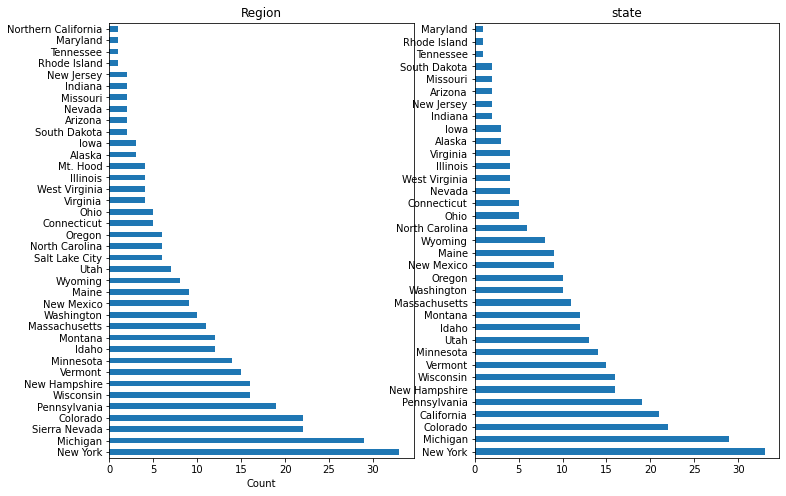

In [15]:
fig, ax= plt.subplots(1, 2, figsize=(12,8))
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Region')
ax[0].set_xlabel('Count')
ski_data.state.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('state')
ax[1].sert_xlabel('Count')
plt.subplots_adjust(wspace=0.5)

In [ ]:
state_price_means= ski_data.groupby('state')[['AdultWeekday','AdultWeekend']].mean()
state_price_means.head()

In [ ]:
(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)');

In [ ]:
ticket_prices= pd.melt(ski_data[['state','AdultWeekday','AdultWeekend']], id_vars= 'state', var_name='Ticket', value_vars=['AdultWeekday','AdultWeekend'],value_name='Price')

In [16]:
ticket_prices.head()

NameError: name 'ticket_prices' is not defined

NameError: name 'ticket_prices' is not defined

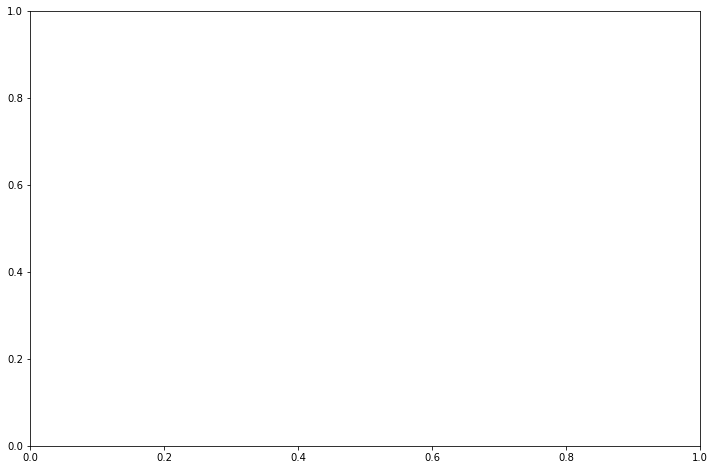

In [17]:
plt.subplots(figsize=(12,8))
sns.boxplot(x= 'state',y='Price', hue='Ticket', data= ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State')

In [18]:
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


In [19]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.424242
2    14.242424
1     3.333333
dtype: float64

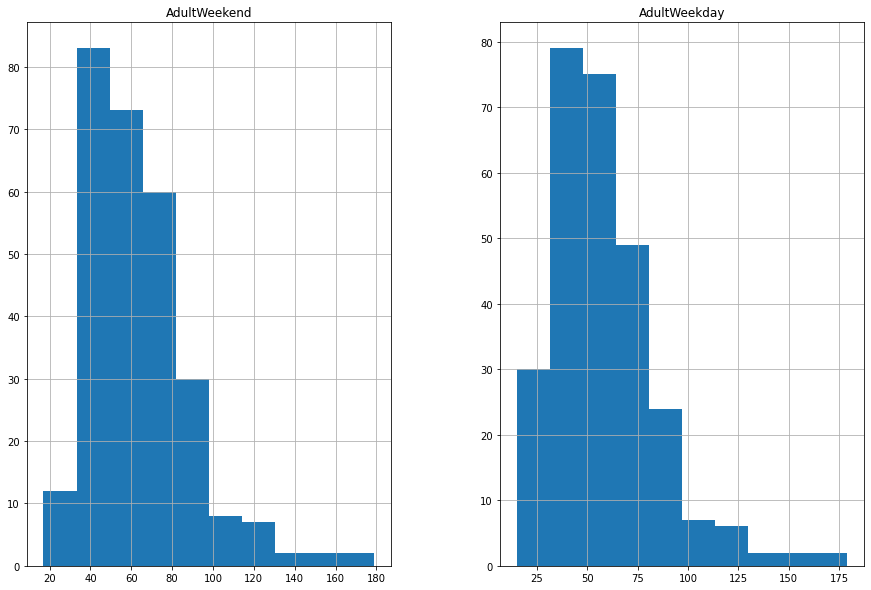

In [20]:
ski_data.hist(['AdultWeekend', 'AdultWeekday'], figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [21]:
ski_data.SkiableTerrain_ac[ski_data.SkiableTerrain_ac>10000]

39    26819.0
Name: SkiableTerrain_ac, dtype: float64

In [22]:
ski_data[ski_data.SkiableTerrain_ac > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0.0
fastSixes,0
fastQuads,0


In [23]:
ski_data.loc[39,'SkiableTerrain_ac']

26819.0

In [24]:
ski_data.loc[39,'SkiableTerrain_ac']=1819

In [25]:
ski_data.loc[39,'SkiableTerrain_ac']

1819.0

Text(0.5, 1.0, 'Distribution of skiable area (acres) after replacing erroneous value')

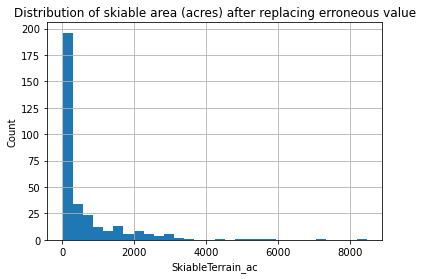

In [26]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value')

In [27]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [28]:
ski_data[ski_data['Snow Making_ac'] > 3000].T   # Redo please

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0.0
fastSixes,2
fastQuads,7


In [29]:
.6*4800

2880.0

In [30]:
ski_data.fastEight.value_counts()

0.0    163
1.0      1
Name: fastEight, dtype: int64

In [31]:
ski_data.drop(columns= 'fastEight', inplace=True)

In [32]:
ski_data.loc[ski_data['yearsOpen']>100]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
34,Howelsen Hill,Colorado,Colorado,7136,440,6696,0,0,0,0,...,6.0,50.0,25.0,100.0,104.0,150.0,25.0,25.0,100.0,10.0
115,Pine Knob Ski Resort,Michigan,Michigan,1308,300,1009,0,0,0,0,...,1.0,80.0,80.0,NaN,2019.0,NaN,49.0,57.0,NaN,NaN


Text(0.5, 1.0, 'Distribution of years open excluding 2019')

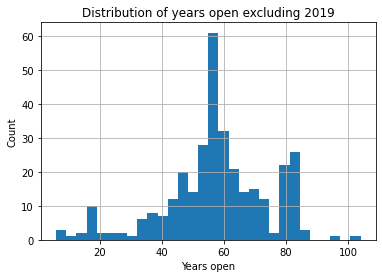

In [33]:
ski_data.yearsOpen[ski_data.yearsOpen<1000].hist(bins=30)
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019')

In [34]:
ski_data.yearsOpen[ski_data.yearsOpen <1000].describe()

count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

In [35]:
ski_data=ski_data[ski_data.yearsOpen <1000]

In [36]:
state_summary=ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc= 'size'),
    state_total_skiable_area_ac= pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open= pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks= pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ac= pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')).reset_index()

state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


In [37]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.317073
2    14.329268
1     3.353659
dtype: float64

In [38]:
ski_data=ski_data[missing_price != 2]

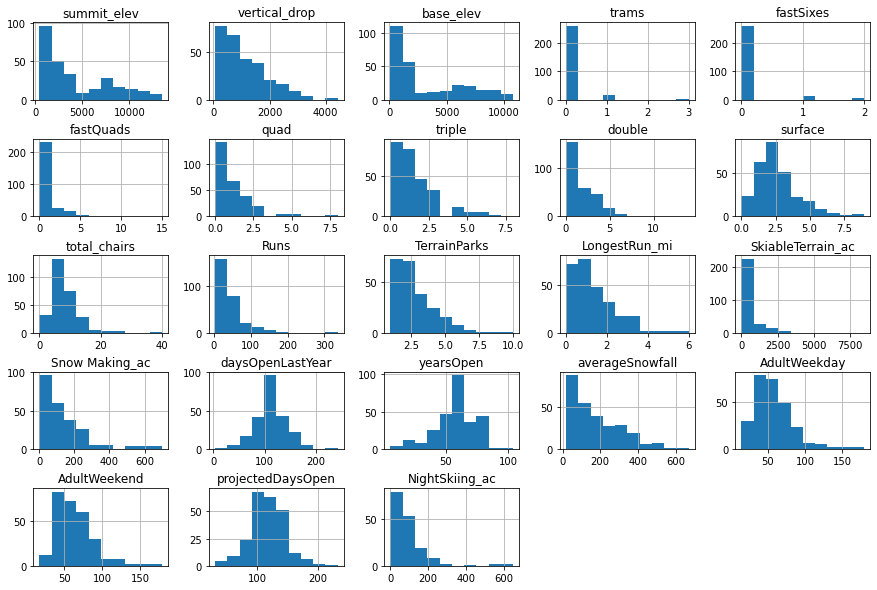

In [39]:
ski_data.hist( figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

In [48]:
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [49]:
type(usa_states)

list

In [50]:
len(usa_states)

1

In [51]:
usa_states = usa_states[0]
usa_states.head()

Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[A] Population[B][3] Total area[4]          Land area[4]  \
  Established[A] Population[B][3]           mi2      km2          mi2   
0   Dec 14, 1819          4903185         52420   135767        50645   
1    Jan 3, 1959           731545        665384  1723337       570641   
2   Feb 14, 1912          7278717        113990   295234       113594   
3   Jun 15, 1836          3017804         53179   137732        52035   
4    Sep 9, 1850         39512223        163695   423967       155779   

           Water area[4]         Numberof Reps.  
       km2           mi2     km2 Numberof Reps.  
0   131171          1775    4597              7  
1  1477953         94743  245384              1  
2   294207           396    1026              9  
3   134771          1143    2961              4  
4   403466          7916   20501             53

In [52]:
established = usa_states.iloc[:, 4]

In [53]:
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[A], Established[A]), dtype: obj

In [72]:
usa_states_sub = usa_states.iloc[:, [0,5,6]].copy()
usa_states_sub.columns = ['state','state_population','state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


In [73]:
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

In [75]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[C]
37     Pennsylvania[C]
38     Rhode Island[D]
45         Virginia[C]
47       West Virginia
Name: state, dtype: object

In [76]:
usa_states_sub.state.replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [77]:
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

set()

In [78]:
state_summary = state_summary.merge(usa_states_sub, how='left', on='state')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population_x,state_area_sq_miles_x,state_population_y,state_area_sq_miles_y
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543,3565278,5543


<AxesSubplot:xlabel='AdultWeekday', ylabel='AdultWeekend'>

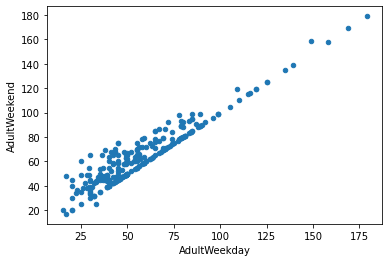

In [79]:
ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind='scatter')

In [80]:
ski_data.loc[ski_data.state=='Montana', ['AdultWeekday','AdultWeekend']]

,AdultWeekday,AdultWeekend
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


In [81]:
ski_data[['AdultWeekday','AdultWeekend']].isnull().sum()

AdultWeekday    7
AdultWeekend    4
dtype: int64

In [82]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [83]:
ski_data.shape

(277, 25)

In [84]:
missing= pd.concat([ski_data.isnull().sum(axis=1), 100*ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
329,5,20.0
62,5,20.0
141,5,20.0
86,5,20.0
74,5,20.0
146,5,20.0
184,4,16.0
108,4,16.0
198,4,16.0
39,4,16.0


In [85]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

In [86]:
missing['%'].value_counts()

0.0     107
4.0      94
8.0      45
12.0     15
16.0     10
20.0      6
Name: %, dtype: int64

In [87]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [88]:
ski_data.shape

(277, 25)

In [91]:
datapath = '/Users/josephlim/PycharmProjects/data'
save_file(ski_data, 'ski_data_cleaned.csv', datapath)

NameError: name 'save_file' is not defined

In [ ]:
datapath='/Users/josephlim/PycharmProjects/data'
save_file(state_summary, 'state_summary.csv', datapath)